# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

In [3]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [4]:
X = np.array(data['population'])
y = np.array(data['profit'])

In [5]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [6]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [7]:
theta = np.array([0,0], float)

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [8]:
def predict(X, theta):
    return theta[0] + X * theta[1]

In [9]:
predict(X, theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [10]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.shape[0]
    i = 0
    tmp = np.array([0,0], float)
    
    # Boucler sur le nombre d'itérations
    for i in range (num_iters):
        
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        tmp[0] = theta[0] - alpha * (1/m) * np.sum(predict(X,theta) - y)
        tmp[1] = theta[1] - alpha * (1/m) * np.sum((predict(X,theta) - y) * X)
        theta = tmp

    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [11]:
new_theta = fit(X, y, theta, 0.01, 1500)

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [12]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

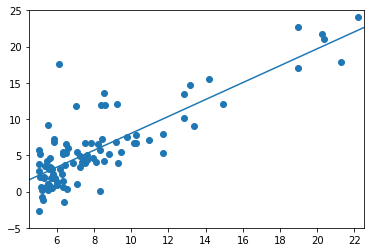

In [13]:
visualize(new_theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [14]:
def cost(X, y, theta):
    return (1/(2*X.shape[0])) * np.sum((predict(X,theta)-y)**2)


### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [15]:
cost(X,y,theta)

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [16]:
theta = np.array([-1,2], float)
cost(X,y,theta)

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [17]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.shape[0]
    i = 0
    tmp = np.array([0,0], float)
    J_history=[]
    
    # Boucler sur le nombre d'itérations
    for i in range (num_iters):
        
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        tmp[0] = theta[0] - alpha * (1/m) * np.sum(predict(X,theta) - y)
        tmp[1] = theta[1] - alpha * (1/m) * np.sum((predict(X,theta) - y) * X)
        theta = tmp
        J_history = J_history + [cost(X,y,theta)]
        
    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [18]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [19]:
# Lancez l'entraînement avec votre nouvelle fonction
J_history = fit_with_cost(X,y,theta,0.00001,1500)[1]

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

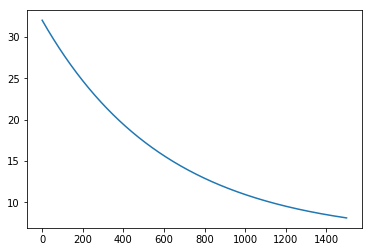

In [20]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)